# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

total_ride = pyber_data_df.groupby(["type"]).count()["ride_id"]


In [4]:
total_ride

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type

total_driver = city_data_df.groupby(["type"]).sum()["driver_count"]

In [6]:
total_driver

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type

total_fare_amount = pyber_data_df.groupby(["type"]).sum()["fare"]




In [8]:
total_fare_amount

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 

#avg_ride_fare = pyber_data_df.groupby(["type"]).mean()["fare"]

avg_ride_fare = total_fare_amount/total_ride

In [10]:
avg_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 

avg_driver_fare = total_fare_amount / total_driver


In [12]:
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({
        "Total Rides": total_ride,
        "Total Drivers": total_driver,
        "Total Fares": total_fare_amount,
        "Average Fare per Ride": avg_ride_fare,
        "Average Fare per Driver": avg_driver_fare})

In [14]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [15]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [16]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)



In [17]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [18]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [19]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


sum_type_dates = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]

In [20]:
sum_type_dates

,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
...,...,...
5/8/2019 1:54,Urban,32.69
5/8/2019 2:31,Urban,41.33
5/8/2019 4:20,Urban,21.99


In [21]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

sum_type_dates = sum_type_dates.reset_index()
sum_type_dates

,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [22]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_date_pivot = sum_type_dates.pivot(index="date", columns="type") ["fare"]
pyber_date_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [28]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_date_pivot_table = pyber_date_pivot.loc['2019-01-01':'2019-04-29']
pyber_date_pivot_table.head(20)

type,Rural,Suburban,Urban
date,,,


In [29]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_date_pivot.index = pd.to_datetime(pyber_date_pivot.index)
pyber_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [30]:
# 7. Check that the datatype for the index is datetime using df.info()

pyber_date_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     0 non-null      float64
 1   Suburban  0 non-null      float64
 2   Urban     0 non-null      float64
dtypes: float64(3)
memory usage: 0.0+ bytes


In [31]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_date_pivot_table = pyber_date_pivot_table.resample("W").sum()

pyber_date_pivot_table

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

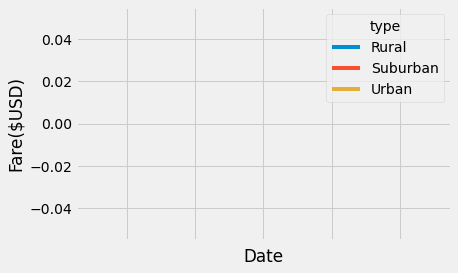

In [32]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Plot the pivot table
pyber_date_pivot_table.plot()


# Create labels for the x and y axes.
plt.xlabel("Date")
plt.ylabel("Fare($USD)")
plt.line(label = "type")

# Set the y limit between 0 and 2500.
plt.ylim(0, 2500)

# Create a title.
plt.title("Total Fare by City Type")

# Add the legend.
plt.legend()

